In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("rent_right_data.csv")
data.head()

,type,area,bed,bath,toilet,price
0,flat / apartment,Maryland,2,2,2,1000000
1,detached duplex,Lekki,5,5,6,4000000
2,detached duplex,Lekki,4,4,5,3500000
3,terraced duplex,Ikeja,4,4,5,5500000
4,semi detached duplex,Lekki,4,4,5,4000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    731 non-null    object
 1   area    731 non-null    object
 2   bed     731 non-null    int64 
 3   bath    731 non-null    int64 
 4   toilet  731 non-null    int64 
 5   price   731 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 34.4+ KB


In [60]:
data.describe()

,bed,bath,toilet,price
count,731.000000,731.000000,731.000000,7.310000e+02
mean,3.233926,3.272230,4.030096,8.701933e+06
std,1.016978,1.047388,1.197794,1.510336e+07
min,1.000000,1.000000,1.000000,2.500000e+04
25%,3.000000,3.000000,3.000000,3.000000e+06
50%,3.000000,3.000000,4.000000,6.000000e+06
75%,4.000000,4.000000,5.000000,1.000000e+07
max,7.000000,7.000000,8.000000,2.200000e+08


In [61]:
data.shape

(731, 6)

In [62]:
# Check if there are any null values
data.isnull().sum()

type      0
area      0
bed       0
bath      0
toilet    0
price     0
dtype: int64

<AxesSubplot:>

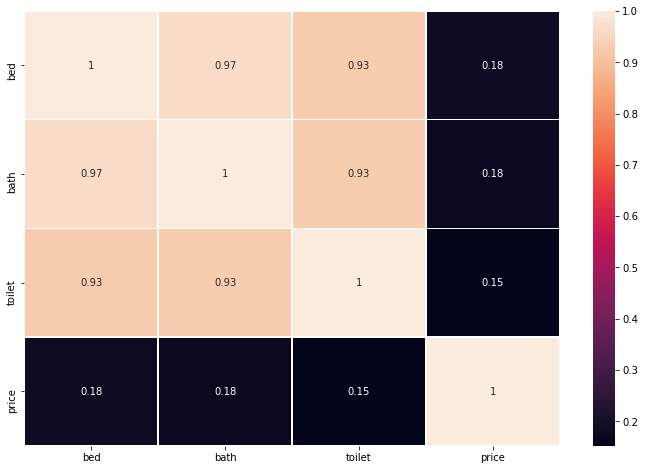

In [63]:
#VISUALIZATION
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,  linewidths=.6, ax = ax)

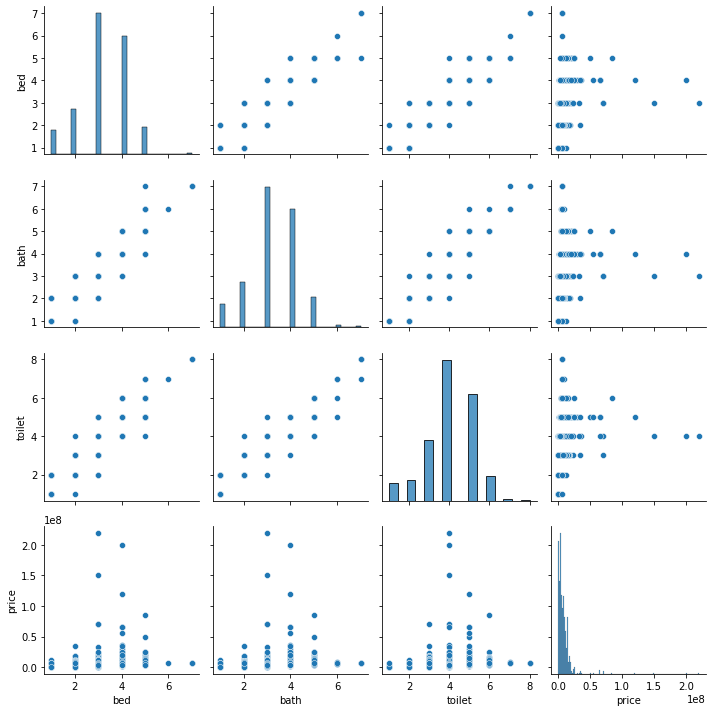

In [64]:
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()

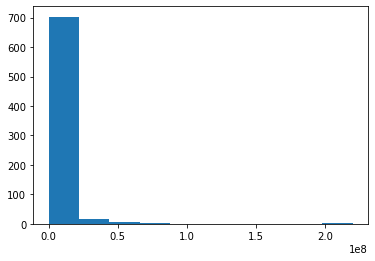

In [65]:
# Visualizing house prices
plt.hist(data['price'])
plt.show()

C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='toilet', ylabel='count'>

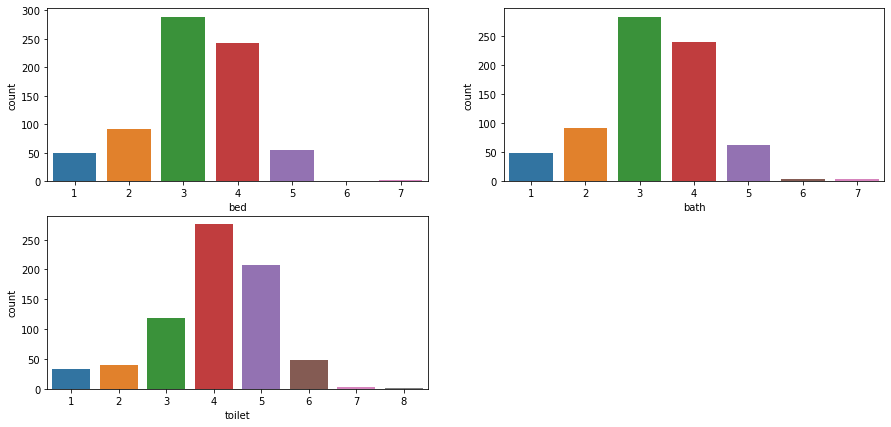

In [66]:
# Visualizing bedroom, bathroom, toilet &Parking space

fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data['bed'])
fig.add_subplot(2,2,2)
sns.countplot(data['bath'])
fig.add_subplot(2,2,3)
sns.countplot(data['toilet'])


C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<AxesSubplot:xlabel='toilet', ylabel='price'>

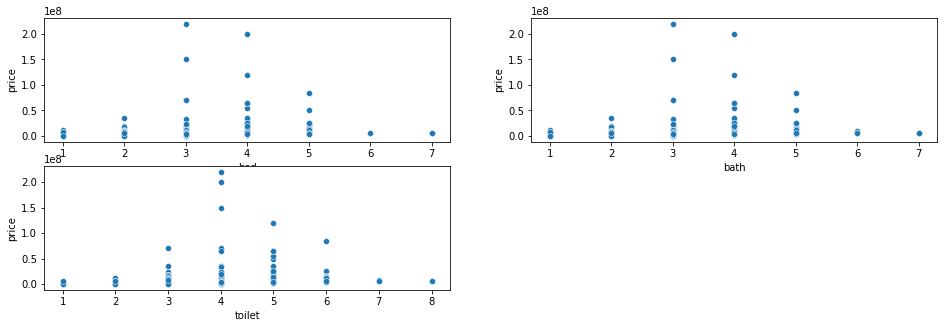

In [67]:
#visualizing some features distribution vs. price

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['bed'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['bath'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(data['toilet'],data['price'])



                                         


## Dataset Preparation (Splitting and Scaling)

Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set. Features (X): The columns that are inserted into our model will be used to make predictions. Prediction (Y): Target variable that will be predicted by the features


In [68]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [69]:
data = pd.read_csv("rent_right_data.csv")
data = data.drop('type',axis=1)
data = data.drop('area',axis=1)
data.head(5)


,bed,bath,toilet,price
0,2,2,2,1000000
1,5,5,6,4000000
2,4,4,5,3500000
3,4,4,5,5500000
4,4,4,5,4000000


In [79]:
print(data)

     bed  bath  toilet     price
0      2     2       2   1000000
1      5     5       6   4000000
2      4     4       5   3500000
3      4     4       5   5500000
4      4     4       5   4000000
..   ...   ...     ...       ...
726    5     4       4   3000000
727    4     4       4  20000000
728    3     3       4   2200000
729    3     3       4   3700000
730    2     2       2   6500000

[731 rows x 4 columns]


In [86]:
# split into input (X) and output (y) variables
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')

In [100]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=5,epochs=50)
model.summary()

Epoch 1/50
110/110 [==============================] - 0s 3ms/step - loss: 285186398879744.0000 - val_loss: 358433173798912.0000
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 285186465988608.0000 - val_loss: 358433173798912.0000
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 285186499543040.0000 - val_loss: 358433173798912.0000
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 285186432434176.0000 - val_loss: 358433173798912.0000
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 285186465988608.0000 - val_loss: 358433173798912.0000
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 285186398879744.0000 - val_loss: 358433173798912.0000
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 285186465988608.0000 - val_loss: 358433140244480.0000
Epoch 8/50
110/110 [==============================] - 0s 2ms/step - loss: 285186432434176.0000 - val_los

In [101]:
# evaluate model with Standardized data
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -303743036188262.38 (239639321184054.34) MSE


MAE: 9987980.976002583
MSE: 358432295340186.25
RMSE: 18932308.24120995
VarScore: -2.5900089581920582e-06


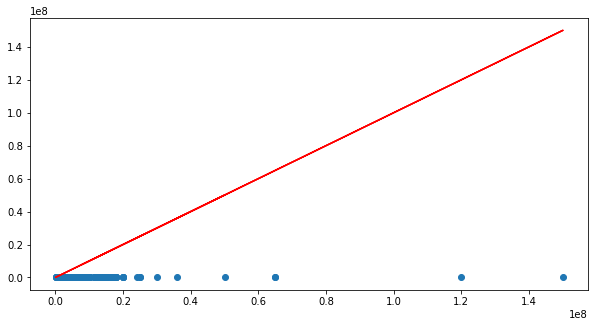

In [102]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [115]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", 'w') as json_file:
    json_file.write(model_json)


In [116]:
# Saving weights of the model to HDF5
model.save_weights('model.h5')